# Process Raw Log File

Used to process and graph data from CSV file generated directly by GCP.

Only allows processing when log is for a single track.

Comes from `Diagnostic` > `Record EZ/EX Values` option.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
file_path_read = r'Output\EZEX-047244A-2025FEB03-12-14.CSV'

df = pd.read_csv(filepath_or_buffer=file_path_read)
df["DateTime"] = pd.to_datetime(df["DateTime"])
df.head()

,Count,DateTime,T2 Ez,T2 CheckEz,T2 Ex,T2 Prime,T2 DAX A
0,0,2025-02-03 12:14:58,100,100,95,125,140
1,1,2025-02-03 12:14:59,100,100,95,125,140
2,2,2025-02-03 12:15:00,100,100,95,125,140
3,3,2025-02-03 12:15:01,100,100,95,125,140
4,4,2025-02-03 12:15:02,100,100,95,125,140


In [14]:
df_data = df.copy()
trackNum = df_data.columns[2].split(" ")[0]
print(trackNum)

newColNames = [
    "COUNT", 
    "DATE TIME", 
    "EZ", 
    "CHECK EZ",
    "EX",
    "PRIME",
    "DAX A",
]

df_data.columns = newColNames
df_data["TRACK NUM"] = trackNum
df_data

T2


,COUNT,DATE TIME,EZ,CHECK EZ,EX,PRIME,DAX A,TRACK NUM
0,0,2025-02-03 12:14:58,100,100,95,125,140,T2
1,1,2025-02-03 12:14:59,100,100,95,125,140,T2
2,2,2025-02-03 12:15:00,100,100,95,125,140,T2
3,3,2025-02-03 12:15:01,100,100,95,125,140,T2
4,4,2025-02-03 12:15:02,100,100,95,125,140,T2
...,...,...,...,...,...,...,...,...
562,566,2025-02-03 12:24:24,1,1,97,120,135,T2
563,567,2025-02-03 12:24:25,1,1,97,120,135,T2
564,568,2025-02-03 12:24:26,1,1,97,120,135,T2
565,569,2025-02-03 12:24:27,1,1,97,120,135,T2


# Plotting EZ and EX values

In [15]:
def plotApproachGraph(df_plot: pd.DataFrame):
    sns.set_theme(style="ticks")
    colors = sns.color_palette(palette='viridis', n_colors=10)
    alpha = 0.45

    fig, ax1 = plt.subplots(figsize=(20, 6))
    ax1.grid(True)
    
    x = "DATE TIME"
    y1 = "EZ"
    y2 = "DAX A"
    y3 = "PRIME"

    sns.lineplot(
        data=df_plot,
        x=x,
        y=y1,
        color=colors[0],
        # palette="flare",
        # hue="TRACK NUM",
        # style="TRACK NUM",
        marker="o",
        label="EZ value",
        ax=ax1,
        legend=False,
    )

    ax2 = ax1.twinx()
    sns.lineplot(
        data=df_plot,
        x=x,
        y=y2,
        color=colors[4],
        alpha=alpha,
        # palette="viridis",
        # hue="TRACK NUM",
        # style="TRACK NUM",
        # marker="o",
        linestyle='--',
        label=y2,
        ax=ax2,
        legend=False,
    )
    sns.lineplot(
        data=df_plot,
        x=x,
        y=y3,
        color=colors[8],
        alpha=alpha,
        # palette="viridis",
        # hue="TRACK NUM",
        # style="TRACK NUM",
        # marker="o",
        linestyle='--',
        label=y3,
        ax=ax2,
        legend=False,
    )

    # Fix the legend (since we're using two axes)
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines1 + lines2, labels1 + labels2, loc='lower left')
    

    # plt.legend()
    plt.title("Approach Graph", fontsize=22)
    plt.show()


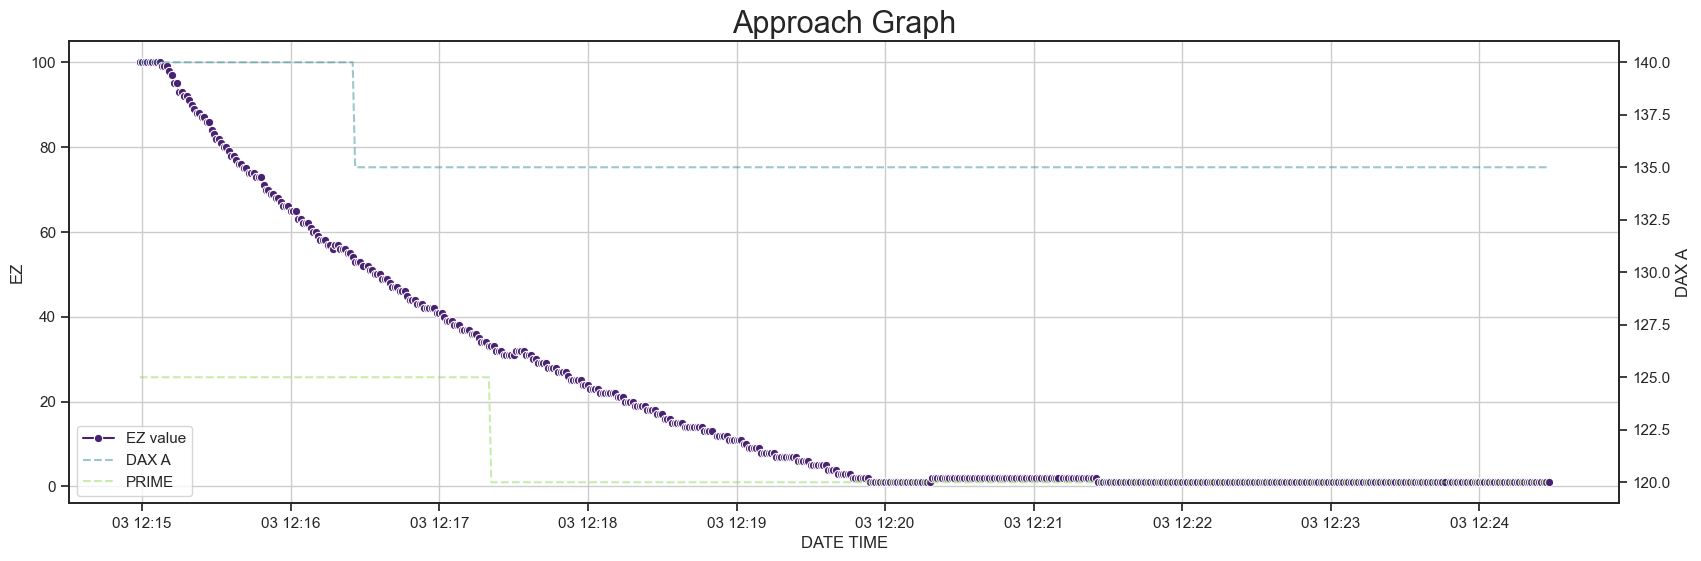

In [16]:
df_plot = df_data
# df_plot = df_plot[df_plot['TRACK NUM'] == "Track 1"]
# df_plot = df_plot[df_plot['DATE TIME'] < pd.Timestamp("2024-04-16 17:45:0")]
# df_plot = df_plot[df_plot['DATE TIME'] > pd.Timestamp("2024-04-16 17:25:0")]
df_plot = df_plot[df_plot['COUNT'] > 0]

plotApproachGraph(df_plot)


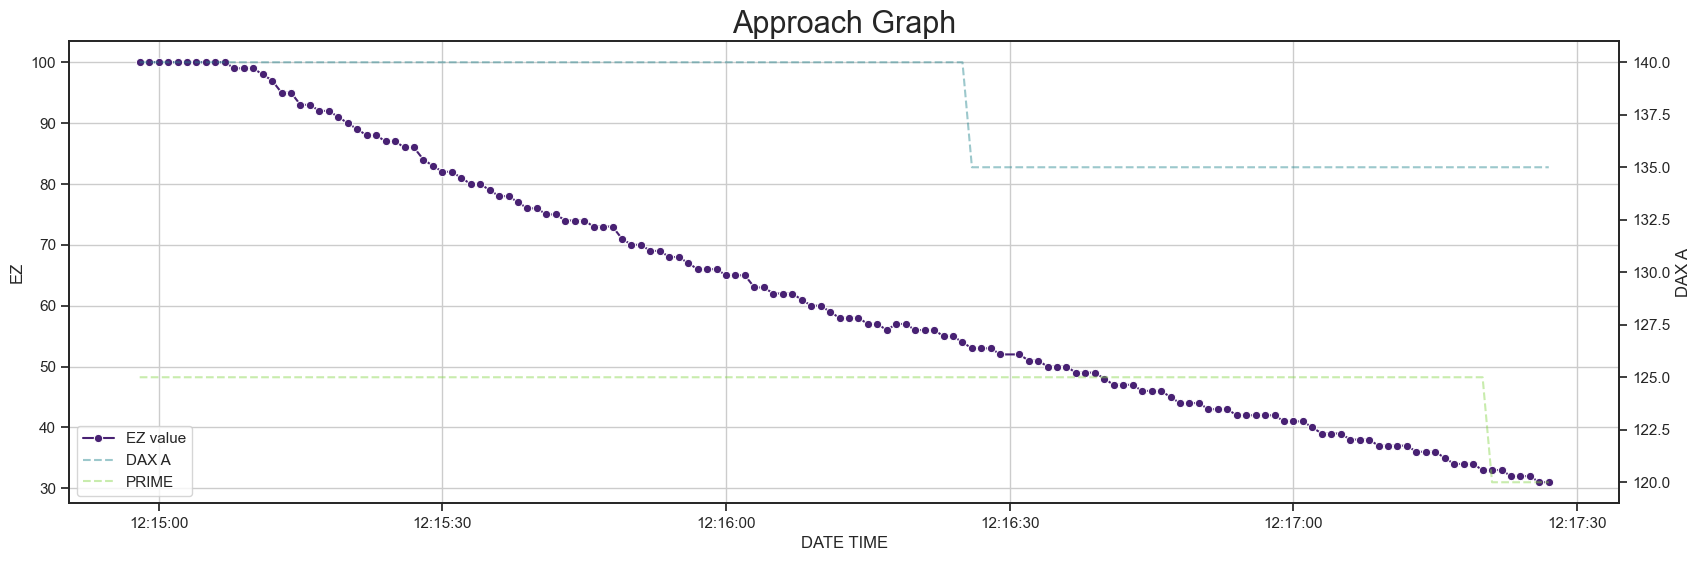

In [17]:
df_plot = df_data
# df_plot = df_plot[df_plot['TRACK NUM'] == "Track 1"]
# df_plot = df_plot[df_plot['DATE TIME'] < pd.Timestamp("2024-04-16 17:45:0")]
# df_plot = df_plot[df_plot['DATE TIME'] > pd.Timestamp("2024-04-16 17:25:0")]
df_plot = df_plot[df_plot['COUNT'] < 150]

plotApproachGraph(df_plot)
